In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage.filters import gabor_kernel
from PIL import Image
from PIL import ImageOps
%matplotlib inline

(-0.5, 199.5, 199.5, -0.5)

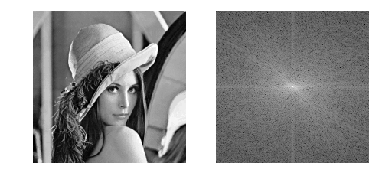

In [2]:
#1
img = Image.open('lenna.jpg')
img = ImageOps.grayscale(img)
img = np.array(img.convert('L'))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.gray()

img_f = np.fft.fft2(img)
img_f_shift = np.fft.fftshift(img_f)
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(img_f_shift)))
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

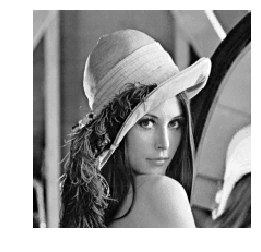

In [3]:
#2
img_ift = np.fft.ifftshift(img_f_shift)
img_ift = np.fft.ifft2(img_ift)
plt.imshow(img_ift.real)
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

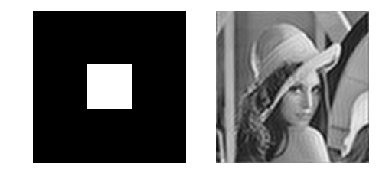

In [4]:
#3
rows = len(img)
cols = len(img[0])
crow,ccol = rows/2 , cols/2

mask = np.zeros((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

plt.subplot(1,2,1)
plt.imshow(mask)
img_lp = img_f_shift * mask
img_lp = np.fft.ifftshift(img_lp) 
img_lp = np.fft.ifft2(img_lp)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_lp.real)
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

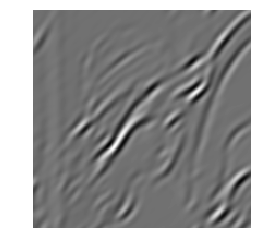

In [5]:
#4
kernel = np.real(gabor_kernel(0.1, theta=np.pi/4,sigma_x=5, sigma_y=5))
img_filtered=sp.signal.convolve2d(img,kernel,mode='same',boundary='symm')
plt.imshow(img_filtered)
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

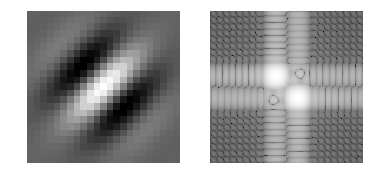

In [6]:
#5
plt.subplot(1,2,1)
plt.imshow(kernel)
plt.axis('off')

kernel_f = np.fft.fft2(kernel,[200,200])
kernel_f_shift = np.fft.fftshift(kernel_f)
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(kernel_f_shift)))
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

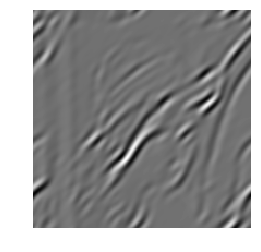

In [7]:
#6
ip = img_f_shift * kernel_f_shift
ip = np.fft.ifftshift(ip) 
ip = np.fft.ifft2(ip)
plt.imshow(ip.real)
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

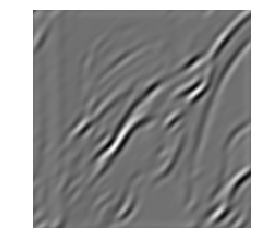

In [8]:
#　using built-in function
a = sp.signal.fftconvolve(img, kernel, mode='same')
plt.imshow(a)
plt.axis('off')